# 1 - Querying top miner UID

In [ ]:
import bittensor as bt

USE_TESTNET=False

if USE_TESTNET:
    metagraph = bt.metagraph(netuid=118, network="test")
else:
    metagraph = bt.metagraph(netuid=2, network="finney")

top_miner_uid = int(metagraph.incentive.argmax())
print(top_miner_uid)


# 2 - Demonstration of Rewards

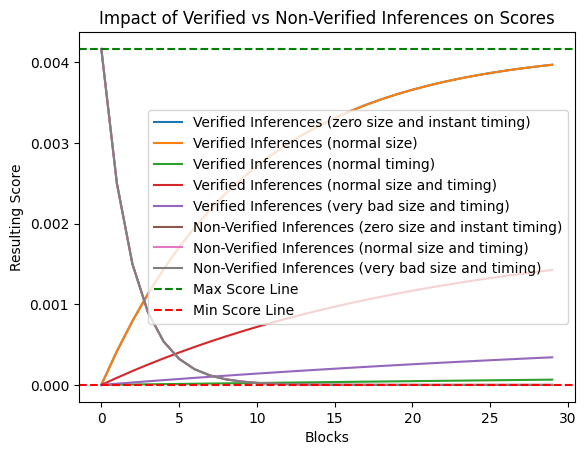

<Figure size 3000x1800 with 0 Axes>

In [6]:
import matplotlib.pyplot as plt
from _validator.reward import reward

try:
    import matplotlib
except ImportError:
    %pip install matplotlib

PLOT_BLOCKS = 30
MAX_SCORE = 1/240

# Define plotter
def plot_values(values, label, linestyle='-'):
    plt.plot([i for i in range(PLOT_BLOCKS)], values, label=label, linestyle=linestyle)

# Generate mock reward values
def generate_proven_values(initial_score, response, size=0, timing=0):
    values = [initial_score]
    for _ in range(PLOT_BLOCKS - 1):
        initial_score = reward(MAX_SCORE, initial_score, response, timing, size, 30, 0)
        values.append(initial_score)
    return values

# Generate and plot all the values
plot_values(generate_proven_values(0, True), 'Verified Inferences (zero size and instant timing)')
plot_values(generate_proven_values(0, True, 3648), 'Verified Inferences (normal size)')
plot_values(generate_proven_values(0, True, 0, 30), 'Verified Inferences (normal timing)')
plot_values(generate_proven_values(0, True, 3648, 20), 'Verified Inferences (normal size and timing)')
plot_values(generate_proven_values(0, True, 100000, 29), 'Verified Inferences (very bad size and timing)')
plot_values(generate_proven_values(MAX_SCORE, False), 'Non-Verified Inferences (zero size and instant timing)')
plot_values(generate_proven_values(MAX_SCORE, False, 21353, 20), 'Non-Verified Inferences (normal size and timing)')
plot_values(generate_proven_values(MAX_SCORE, False, 1000000, 30), 'Non-Verified Inferences (very bad size and timing)')

# Plotting configurations
plt.axhline(y=MAX_SCORE, color='g', linestyle='--', label='Max Score Line')
plt.axhline(y=0, color='r', linestyle='--', label='Min Score Line')
plt.xlabel('Blocks')
plt.ylabel('Resulting Score')
plt.title('Impact of Verified vs Non-Verified Inferences on Scores')
plt.legend()
plt.figure(figsize=(10, 6), dpi=300)
plt.show()


4.932923316955566
Error processing weights for index 38, '<' not supported between instances of 'Parameter' and 'NoneType'
[[0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625,

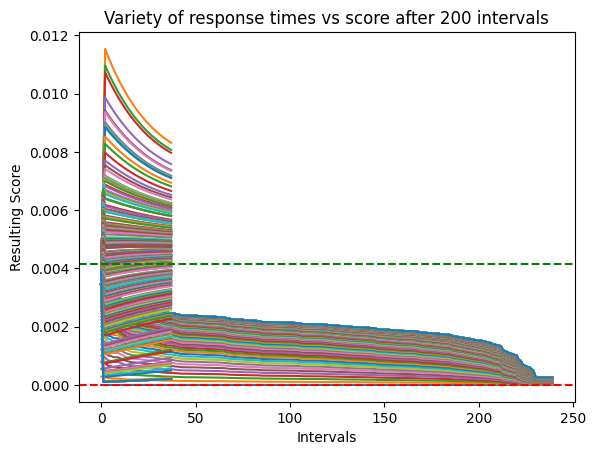

<Figure size 3000x1800 with 0 Axes>

[0.007326938211917877, 0.007139275781810284, 0.007061648182570934, 0.006765884812921286, 0.006607648450881243, 0.00658841710537672, 0.0064621251076459885, 0.006418275646865368, 0.0064177620224654675, 0.006401661317795515, 0.006279557943344116, 0.006186202168464661, 0.0060688890516757965, 0.005964180920273066, 0.005900544114410877, 0.005850383546203375, 0.0057580056600272655, 0.005745043978095055, 0.005727039650082588, 0.005704333074390888, 0.005701693240553141, 0.005677611101418734, 0.005627766717225313, 0.005605236627161503, 0.005553869530558586, 0.005549803841859102, 0.005538563709706068, 0.005512889940291643, 0.005491017829626799, 0.005430168937891722, 0.005424553528428078, 0.005423672031611204, 0.0053312405943870544, 0.005312605760991573, 0.005273488350212574, 0.0052431016229093075, 0.005231423769146204, 0.0052292500622570515, 0.005229196976870298, 0.005167833995074034, 0.005150684621185064, 0.005120885092765093, 0.005063492339104414, 0.005052485968917608, 0.0050503164529800415, 0.

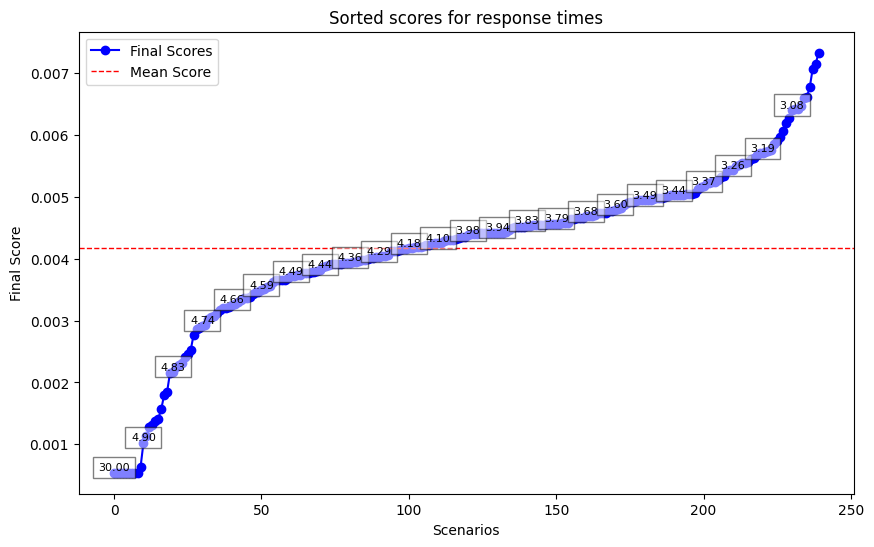

In [5]:

import random
import torch
from _validator.reward import reward
import matplotlib.pyplot as plt
import bittensor as bt
from typing import List, Tuple

# Constants
MAX_RESPONSE_TIME = 5
MIN_RESPONSE_TIME = 3
NUM_KEYS_TO_SIMULATE = 240
PLOT_BLOCKS = 200
MAX_SCORE = 1 / NUM_KEYS_TO_SIMULATE
NUM_OUTLIERS = 1

# Initialize metagraph and subtensor
metagraph = bt.metagraph(netuid=2)
subtensor = bt.subtensor(network="finney")

def plot_values(data: List[List[float]], label: str, linestyle: str = '-') -> None:
    """Plots the given data with the specified label and linestyle."""
    if not data or not data[0]:
        print("Error: Data is empty or improperly formatted.")
        return
    for index in range(len(data[0])):
        values = [sublist[index] for sublist in data if len(sublist) > index]
        plt.plot(range(len(values)), values, label=f'{label} (Index {index})', linestyle=linestyle)

def generate_random_response_times() -> List[float]:
    """Generates and sorts random response times."""
    response_times = [random.uniform(MIN_RESPONSE_TIME, MAX_RESPONSE_TIME) for _ in range(NUM_KEYS_TO_SIMULATE)]
    for i in range(NUM_OUTLIERS):
        response_times[i] = 30  # Set outliers
    return sorted(response_times)

def calculate_median_of_bottom_10_percent(response_times: List[float]) -> float:
    """Calculates the median of the bottom 10% of the response times."""
    response_times_tensor = torch.tensor(response_times)
    bottom_10_percent = response_times_tensor[-int(len(response_times_tensor) * 0.05):]
    return torch.median(bottom_10_percent).item()

def generate_proven_values(uid: int, initial_score: float, response: bool, size: int = 0, timing: float = 0.0) -> List[float]:
    """Generates proven values based on the given parameters."""
    values = [initial_score]
    for _ in range(PLOT_BLOCKS):
        timing = max(timing, 0)
        initial_score = reward(MAX_SCORE, initial_score, response, timing, size, median_of_bottom_10_percent, MIN_RESPONSE_TIME - 0.05)
        values.append(initial_score)
    return values

def process_weights(score_over_time: List[List[float]]) -> List[List[float]]:
    """Processes weights over time."""
    weights_over_time = []
    for index in range(len(score_over_time[0])):
        current_values = [sublist[index] for sublist in score_over_time]
        current_values_tensor = torch.tensor(current_values)
        try:
            processed_weights = bt.utils.weight_utils.process_weights_for_netuid(
                torch.tensor(range(NUM_KEYS_TO_SIMULATE)),
                current_values_tensor,
                index,
                subtensor=subtensor,
                metagraph=metagraph
            )[1].tolist()
            weights_over_time.append(processed_weights)
        except Exception as e:
            print(f"Error processing weights for index {index}, {e}")
            break
    return weights_over_time

def plot_final_scores(final_scores: List[float], response_times: List[float]) -> None:
    """Plots the final scores and response times."""
    final_scores_tensor = torch.tensor(final_scores)
    response_times_tensor = torch.tensor(response_times)
    sorted_indices = torch.argsort(final_scores_tensor)
    sorted_final_scores = final_scores_tensor[sorted_indices]
    sorted_response_times = response_times_tensor[sorted_indices]

    plt.figure(figsize=(10, 6))
    plt.plot(sorted_final_scores.numpy(), color='blue', marker='o', linestyle='-', label='Final Scores')

    for i, (score, response_time) in enumerate(zip(sorted_final_scores, sorted_response_times)):
        if i % 10 == 0:
            plt.text(i, score.item(), f'{response_time.item():.2f}', fontsize=8, ha='center', va='bottom', bbox=dict(facecolor='white', alpha=0.5))

    plt.axhline(torch.mean(sorted_final_scores).item(), color='r', linestyle='dashed', linewidth=1, label='Mean Score')
    plt.xlabel('Scenarios')
    plt.ylabel('Final Score')
    plt.title("Sorted scores for response times")
    plt.legend()
    plt.show()

# Main execution
random_response_times = generate_random_response_times()
median_of_bottom_10_percent = calculate_median_of_bottom_10_percent(random_response_times)
print(median_of_bottom_10_percent)

score_over_time = [generate_proven_values(i, 0, True, 0, response_time) for i, response_time in enumerate(random_response_times)]

# Plot scores before weights processing
plot_values(score_over_time, 'Scores Before Weights Processing')

weights_over_time = process_weights(score_over_time)
print(weights_over_time)

plot_values(weights_over_time, 'Miner Scores Over Time')

# Plotting configurations for the new chart
plt.axhline(y=1 / NUM_KEYS_TO_SIMULATE, color='g', linestyle='--', label='Max Score Line')
plt.axhline(y=0, color='r', linestyle='--', label='Min Score Line')
plt.xlabel('Intervals')
plt.ylabel('Resulting Score')
plt.title(f'Variety of response times vs score after {PLOT_BLOCKS} intervals')
plt.figure(figsize=(10, 6), dpi=300)
plt.show()

final_scores_random = [generate_proven_values(index, 0, True, 3648, rt)[-1] for index, rt in enumerate(random_response_times)]
final_scores_random = bt.utils.weight_utils.process_weights_for_netuid(
    torch.tensor(range(NUM_KEYS_TO_SIMULATE)),
    torch.tensor(final_scores_random),
    2,
    subtensor=subtensor,
    metagraph=metagraph
)[1].tolist()
print(final_scores_random)

plot_final_scores(final_scores_random, random_response_times)
